In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf

In [29]:
df = pd.read_csv('Dataset/weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [30]:
def day_of_year(date_str, date_format="%Y-%m-%d"):
    date_str = date_str.split(' ')[0]
    date_obj = datetime.strptime(date_str, date_format)
    return date_obj.timetuple().tm_yday

df['Formatted Date'] = df['Formatted Date'].apply(day_of_year)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,91,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,91,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,91,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,91,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,91,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [31]:
df = df.groupby('Formatted Date', as_index=False)['Temperature (C)'].mean()
df['Formatted Date'] = df['Formatted Date'] / 366

In [32]:
X = df['Formatted Date'].values
Y = df['Temperature (C)'].values

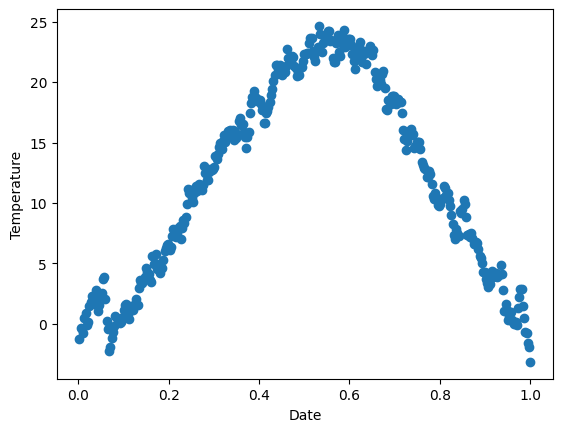

In [33]:
plt.scatter(X, Y)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=42)

x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

print(f'x_train: {len(x_train)}, y_train: {len(y_train)}')
print(f'x_test: {len(x_test)}, y_test: {len(y_test)}')

x_train: 292, y_train: 292
x_test: 74, y_test: 74


In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(30, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(14, activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

In [42]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
    loss=tf.keras.losses.mae
)

In [43]:
result = model.fit(x_train, y_train, epochs=300)

Epoch 1/300
10/10 [==============================] - 1s 999us/step - loss: 4.2888
Epoch 2/300
10/10 [==============================] - 0s 889us/step - loss: 4.2647
Epoch 3/300
10/10 [==============================] - 0s 1ms/step - loss: 4.2548
Epoch 4/300
10/10 [==============================] - 0s 1ms/step - loss: 4.2498
Epoch 5/300
10/10 [==============================] - 0s 1000us/step - loss: 4.2445
Epoch 6/300
10/10 [==============================] - 0s 1ms/step - loss: 4.2449
Epoch 7/300
10/10 [==============================] - 0s 1000us/step - loss: 4.2468
Epoch 8/300
10/10 [==============================] - 0s 1ms/step - loss: 4.2477
Epoch 9/300
10/10 [==============================] - 0s 1ms/step - loss: 4.2443
Epoch 10/300
10/10 [==============================] - 0s 889us/step - loss: 4.2452
Epoch 11/300
10/10 [==============================] - 0s 1ms/step - loss: 4.2413
Epoch 12/300
10/10 [==============================] - 0s 889us/step - loss: 4.2532
Epoch 13/300
10/10 [===

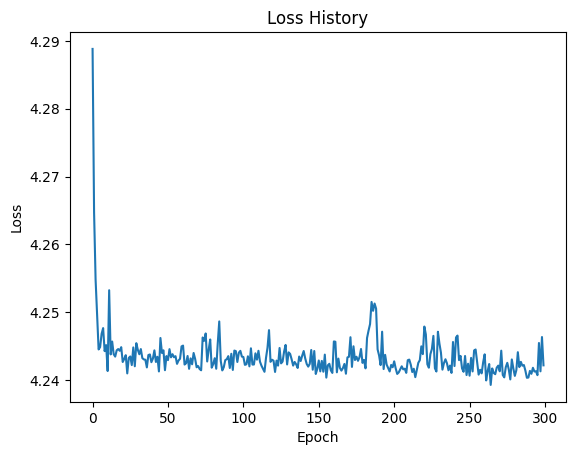

In [44]:
plt.plot(result.history['loss'])
plt.title('Loss History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [45]:
result = model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 4.8597


In [46]:
result

4.859700679779053